In [13]:
import pandas as pd
import numpy as np
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [14]:
train = train.rename(columns={'Unnamed: 0': 'date_forecast'})
test = test.rename(columns={'date_forecast_00': 'date_forecast'})

train.set_index('date_forecast', inplace=True)
test.set_index('date_forecast', inplace=True)
test=test.drop(columns=['date_calc_00','date_calc_15','date_calc_30','date_calc_45'])


In [15]:
import re
train = train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
test = test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [16]:
train[['snow_densitykgm3_00','snow_densitykgm3_15','snow_densitykgm3_30','snow_densitykgm3_45']].fillna(0)
for col in train.columns:
    train[col].fillna(train[col].mode()[0], inplace=True)
train.fillna(0)

absolute_humidity_2mgm3_00  air_density_2mkgm3_00  \
date_forecast                                                            
2019-06-02 22:00:00                         7.7                  1.230   
2019-06-02 23:00:00                         7.7                  1.225   
2019-06-03 00:00:00                         7.7                  1.221   
2019-06-03 01:00:00                         8.2                  1.218   
2019-06-03 02:00:00                         8.8                  1.219   
...                                         ...                    ...   
2023-04-30 19:00:00                         4.6                  1.275   
2023-04-30 20:00:00                         4.5                  1.279   
2023-04-30 21:00:00                         4.5                  1.281   
2023-04-30 22:00:00                         4.5                  1.281   
2023-04-30 23:00:00                         4.5                  1.281   

                     ceiling_height_aglm_00  clear_sky_energy_1hJ_00  \
date_forecast                                                          
2019-06-02 22:00:00                  1744.9                      0.0   
2019-06-02 23:00:00                  1703.6                      0.0   
2019-06-03 00:00:00                  1668.1                      0.0   
2019-06-03 01:00:00                  1388.4                      0.0   
2019-06-03 02:00:00                  1108.5                   6546.9   
...                                     ...                      ...   
2023-04-30 19:00:00                  1633.0                 157319.8   
2023-04-30 20:00:00                  1742.9                   8133.9   
2023-04-30 21:00:00                  1794.9                      0.0   
2023-04-30 22:00:00                  1532.9                      0.0   
2023-04-30 23:00:00                  1054.2                      0.0   

                     clear_sky_radW_00  cloud_base_aglm_00  dew_or_rimeidx_00  \
date_forecast                                                                   
2019-06-02 22:00:00                0.0              1744.9                0.0   
2019-06-02 23:00:00                0.0              1703.6                0.0   
2019-06-03 00:00:00                0.0              1668.1                0.0   
2019-06-03 01:00:00                0.0              1388.4                0.0   
2019-06-03 02:00:00                9.8              1108.5                0.0   
...                                ...                 ...                ...   
2023-04-30 19:00:00               13.5               547.5                0.0   
2023-04-30 20:00:00                0.0               534.7                0.0   
2023-04-30 21:00:00                0.0               565.9                0.0   
2023-04-30 22:00:00                0.0               519.0                0.0   
2023-04-30 23:00:00                0.0               542.4                0.0   

                     dew_point_2mK_00  diffuse_radW_00  diffuse_rad_1hJ_00  \
date_forecast                                                                
2019-06-02 22:00:00             280.3              0.0                 0.0   
2019-06-02 23:00:00             280.3              0.0                 0.0   
2019-06-03 00:00:00             280.2              0.0                 0.0   
2019-06-03 01:00:00             281.3              0.0                 0.0   
2019-06-03 02:00:00             282.3              4.3              7743.3   
...                               ...              ...                 ...   
2023-04-30 19:00:00             272.5              8.9             94492.0   
2023-04-30 20:00:00             272.3              0.0             15967.4   
2023-04-30 21:00:00             272.3              0.0                 0.0   
2023-04-30 22:00:00             272.3              0.0                 0.0   
2023-04-30 23:00:00             272.2              0.0                 0.0   

                     ...  sun_elevationd_45  super_c

In [19]:
columns = train.drop(columns = 'pv_measurement').columns
df = train

In [20]:
from sklearn.preprocessing import RobustScaler
# Crea un oggetto MinMaaxScaler
scaler = RobustScaler()
# Normalizza il DataFrame
train = pd.DataFrame(scaler.fit_transform(train[columns]),columns = train[columns].columns, index = train[columns].index)
train['pv_measurement'] = df['pv_measurement']

In [21]:
from sklearn.preprocessing import MinMaxScaler
# Crea un oggetto MinMaaxScaler
scaler = RobustScaler()
# Normalizza il DataFrame
test = pd.DataFrame(scaler.fit_transform(test),columns = test.columns, index = test.index)

C:\Users\claxl\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,
C:\Users\claxl\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


In [23]:
df = train
df_test_A = test
df

absolute_humidity_2mgm3_00  air_density_2mkgm3_00  \
date_forecast                                                            
2019-06-02 22:00:00                    0.463415              -0.428571   
2019-06-02 23:00:00                    0.463415              -0.530612   
2019-06-03 00:00:00                    0.463415              -0.612245   
2019-06-03 01:00:00                    0.585366              -0.673469   
2019-06-03 02:00:00                    0.731707              -0.653061   
...                                         ...                    ...   
2023-04-30 19:00:00                   -0.292683               0.489796   
2023-04-30 20:00:00                   -0.317073               0.571429   
2023-04-30 21:00:00                   -0.317073               0.612245   
2023-04-30 22:00:00                   -0.317073               0.612245   
2023-04-30 23:00:00                   -0.317073               0.612245   

                     ceiling_height_aglm_00  clear_sky_energy_1hJ_00  \
date_forecast                                                          
2019-06-02 22:00:00                0.130778                -0.016733   
2019-06-02 23:00:00                0.116478                -0.016733   
2019-06-03 00:00:00                0.104186                -0.016733   
2019-06-03 01:00:00                0.007340                -0.016733   
2019-06-03 02:00:00               -0.089574                -0.009486   
...                                     ...                      ...   
2023-04-30 19:00:00                0.092033                 0.157413   
2023-04-30 20:00:00                0.130086                -0.007729   
2023-04-30 21:00:00                0.148090                -0.016733   
2023-04-30 22:00:00                0.057373                -0.016733   
2023-04-30 23:00:00               -0.108376                -0.016733   

                     clear_sky_radW_00  cloud_base_aglm_00  dew_or_rimeidx_00  \
date_forecast                                                                   
2019-06-02 22:00:00           0.000000            0.524424                0.0   
2019-06-02 23:00:00           0.000000            0.496119                0.0   
2019-06-03 00:00:00           0.000000            0.471790                0.0   
2019-06-03 01:00:00           0.000000            0.280099                0.0   
2019-06-03 02:00:00           0.039298            0.088272                0.0   
...                                ...                 ...                ...   
2023-04-30 19:00:00           0.054135           -0.296205                0.0   
2023-04-30 20:00:00           0.000000           -0.304977                0.0   
2023-04-30 21:00:00           0.000000           -0.283595                0.0   
2023-04-30 22:00:00           0.000000           -0.315737                0.0   
2023-04-30 23:00:00           0.000000           -0.299700                0.0   

                     dew_point_2mK_00  diffuse_radW_00  diffuse_rad_1hJ_00  \
date_forecast                                                                
2019-06-02 22:00:00              0.43         0.000000           -0.061817   
2019-06-02 23:00:00              0.43         0.000000           -0.061817   
2019-06-03 00:00:00              0.42         0.000000           -0.061817   
2019-06-03 01:00:00              0.53         0.000000           -0.061817   
2019-06-03 02:00:00              0.63         0.060414           -0.031558   
...                               ...              ...                 ...   
2023-04-30 19:00:00             -0.35         0.125044            0.307440   
2023-04-30 20:00:00             -0.37         0.000000            0.000581   
2023-04-30 21:00:00             -0.37         0.000000           -0.061817   
2023-04-30 22:00:00             -0.37         0.000000           -0.061817   
2023-04-30 23:00:00             -0.38         0.000000           -0.061817   

                     ...  sun_elevationd_45  super_c

In [ ]:
import pandas as pd
import math

# Function to calculate solar zenith angle
def calculate_solar_zenith(row):
    t = row['hour_00']
    Az = row['sun_azimuthd']
    
    # Calculate the solar zenith angle (θ) using a simplified model
    solar_zenith_angle = 90 - abs(t - 12) * (90 / 6)  # Assumes the sun is highest at noon
    
    # Ensure the solar zenith angle is between 0 and 90 degrees
    solar_zenith_angle = max(0, min(90, solar_zenith_angle))
    
    return solar_zenith_angle

# Apply the function to each row in the DataFrame
df['Solar Zenith Angle (degrees)'] = df.apply(calculate_solar_zenith, axis=1)
df_test_A['Solar Zenith Angle (degrees)'] = df_test_A.apply(calculate_solar_zenith, axis=1)

In [ ]:
def calculate_total_radiation(row):
    DNI = row['direct_radW']
    solar_zenith_angle = row['Solar Zenith Angle (degrees)']
    DHI = row['diffuse_radW']
    # Calculate total solar radiation (G) using the formula
    G = DNI * math.cos(math.radians(solar_zenith_angle)) + DHI
    
    return G

# Apply the function to each row in the DataFrame
df['Total Solar Radiation'] = df.apply(calculate_total_radiation, axis=1)
df_test_A['Total Solar Radiation (W/m²)'] = df_test_A.apply(calculate_total_radiation, axis=1)

In [85]:
feature =['hours',
 'direct_rad_1hJ',
 'sun_elevationd',
 'sun_azimuthd',
 'hour_sin',
 'hour_cos',
 'direct_radW',
 'diffuse_rad_1hJ',
 'diffuse_radW',
 'clear_sky_radW',
 'clear_sky_energy_1hJ',
 'pv_measurement']

#season
#is shadow


In [100]:
feature_test =['absolute_humidity_2mgm3', 'air_density_2mkgm3', 'ceiling_height_aglm',
       'clear_sky_energy_1hJ', 'clear_sky_radW', 'cloud_base_aglm',
       'dew_or_rimeidx', 'dew_point_2mK', 'diffuse_radW', 'diffuse_rad_1hJ',
       'direct_radW', 'direct_rad_1hJ', 'effective_cloud_coverp', 'elevationm',
       'fresh_snow_12hcm', 'fresh_snow_1hcm', 'fresh_snow_24hcm',
       'fresh_snow_3hcm', 'fresh_snow_6hcm', 'is_dayidx', 'is_in_shadowidx',
       'msl_pressurehPa', 'precip_5minmm', 'precip_type_5minidx',
       'pressure_100mhPa', 'pressure_50mhPa', 'prob_rimep', 'rain_waterkgm2',
       'relative_humidity_1000hPap', 'sfc_pressurehPa', 'snow_densitykgm3',
       'snow_depthcm', 'snow_driftidx', 'snow_melt_10minmm', 'snow_waterkgm2',
       'sun_azimuthd', 'sun_elevationd', 'super_cooled_liquid_waterkgm2',
       't_1000hPaK', 'total_cloud_coverp', 'visibilitym', 'wind_speed_10mms',
       'wind_speed_u_10mms', 'wind_speed_v_10mms', 'wind_speed_w_1000hPams']

In [87]:
df_knn.columns

Index(['absolute_humidity_2mgm3', 'air_density_2mkgm3', 'ceiling_height_aglm',
       'clear_sky_energy_1hJ', 'clear_sky_radW', 'cloud_base_aglm',
       'dew_or_rimeidx', 'dew_point_2mK', 'diffuse_radW', 'diffuse_rad_1hJ',
       'direct_radW', 'direct_rad_1hJ', 'effective_cloud_coverp', 'elevationm',
       'fresh_snow_12hcm', 'fresh_snow_1hcm', 'fresh_snow_24hcm',
       'fresh_snow_3hcm', 'fresh_snow_6hcm', 'is_dayidx', 'is_in_shadowidx',
       'msl_pressurehPa', 'precip_5minmm', 'precip_type_5minidx',
       'pressure_100mhPa', 'pressure_50mhPa', 'prob_rimep', 'rain_waterkgm2',
       'relative_humidity_1000hPap', 'sfc_pressurehPa', 'snow_densitykgm3',
       'snow_depthcm', 'snow_driftidx', 'snow_melt_10minmm', 'snow_waterkgm2',
       'sun_azimuthd', 'sun_elevationd', 'super_cooled_liquid_waterkgm2',
       't_1000hPaK', 'total_cloud_coverp', 'visibilitym', 'wind_speed_10mms',
       'wind_speed_u_10mms', 'wind_speed_v_10mms', 'wind_speed_w_1000hPams',
       'pv_measurement'],

In [27]:
target = 'pv_measurement'

In [28]:
df

absolute_humidity_2mgm3_00  air_density_2mkgm3_00  \
date_forecast                                                            
2019-06-02 22:00:00                    0.463415              -0.428571   
2019-06-02 23:00:00                    0.463415              -0.530612   
2019-06-03 00:00:00                    0.463415              -0.612245   
2019-06-03 01:00:00                    0.585366              -0.673469   
2019-06-03 02:00:00                    0.731707              -0.653061   
...                                         ...                    ...   
2023-04-30 19:00:00                   -0.292683               0.489796   
2023-04-30 20:00:00                   -0.317073               0.571429   
2023-04-30 21:00:00                   -0.317073               0.612245   
2023-04-30 22:00:00                   -0.317073               0.612245   
2023-04-30 23:00:00                   -0.317073               0.612245   

                     ceiling_height_aglm_00  clear_sky_energy_1hJ_00  \
date_forecast                                                          
2019-06-02 22:00:00                0.130778                -0.016733   
2019-06-02 23:00:00                0.116478                -0.016733   
2019-06-03 00:00:00                0.104186                -0.016733   
2019-06-03 01:00:00                0.007340                -0.016733   
2019-06-03 02:00:00               -0.089574                -0.009486   
...                                     ...                      ...   
2023-04-30 19:00:00                0.092033                 0.157413   
2023-04-30 20:00:00                0.130086                -0.007729   
2023-04-30 21:00:00                0.148090                -0.016733   
2023-04-30 22:00:00                0.057373                -0.016733   
2023-04-30 23:00:00               -0.108376                -0.016733   

                     clear_sky_radW_00  cloud_base_aglm_00  dew_or_rimeidx_00  \
date_forecast                                                                   
2019-06-02 22:00:00           0.000000            0.524424                0.0   
2019-06-02 23:00:00           0.000000            0.496119                0.0   
2019-06-03 00:00:00           0.000000            0.471790                0.0   
2019-06-03 01:00:00           0.000000            0.280099                0.0   
2019-06-03 02:00:00           0.039298            0.088272                0.0   
...                                ...                 ...                ...   
2023-04-30 19:00:00           0.054135           -0.296205                0.0   
2023-04-30 20:00:00           0.000000           -0.304977                0.0   
2023-04-30 21:00:00           0.000000           -0.283595                0.0   
2023-04-30 22:00:00           0.000000           -0.315737                0.0   
2023-04-30 23:00:00           0.000000           -0.299700                0.0   

                     dew_point_2mK_00  diffuse_radW_00  diffuse_rad_1hJ_00  \
date_forecast                                                                
2019-06-02 22:00:00              0.43         0.000000           -0.061817   
2019-06-02 23:00:00              0.43         0.000000           -0.061817   
2019-06-03 00:00:00              0.42         0.000000           -0.061817   
2019-06-03 01:00:00              0.53         0.000000           -0.061817   
2019-06-03 02:00:00              0.63         0.060414           -0.031558   
...                               ...              ...                 ...   
2023-04-30 19:00:00             -0.35         0.125044            0.307440   
2023-04-30 20:00:00             -0.37         0.000000            0.000581   
2023-04-30 21:00:00             -0.37         0.000000           -0.061817   
2023-04-30 22:00:00             -0.37         0.000000           -0.061817   
2023-04-30 23:00:00             -0.38         0.000000           -0.061817   

                     ...  sun_elevationd_45  super_c

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# Generate some example time series data
# Replace this with your own time series data
data = df

# Define the number of splits for time series cross-validation
n_splits = 3
tscv = TimeSeriesSplit(n_splits=n_splits,test_size = 720)

# Initialize empty arrays to store meta features and true targets
meta_features = np.empty(data.shape[0])

# Iterate through time series cross-validation splits
for train_index, test_index in tscv.split(data):
    train_data = data.iloc[train_index]
    test_data = data.iloc[test_index]
    
    # Split the data into features and target
    X_train = train_data.drop(columns=target)
    y_train = train_data['pv_measurement']
    X_test = test_data.drop(columns=target)
    y_test = test_data['pv_measurement']
    lgbmpar = {'verbose' : -1 }
    lgbm_model = LGBMRegressor(**lgbmpar)
    lgbm_model.fit(X_train, y_train)
    catapar = {'verbose':500}
    # Initialize and train the CatBoost model
    catboost_model = CatBoostRegressor(**catapar)
    catboost_model.fit(X_train, y_train)
    
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Make predictions on the test data
    lgbm_preds = lgbm_model.predict(X_test)
    catboost_preds = catboost_model.predict(X_test)
    rf_preds = rf_model.predict(X_test)
    mae_lgbm = mean_absolute_error(y_test, lgbm_preds)
    mae_cat = mean_absolute_error(y_test, catboost_preds)
    mae_rf = mean_absolute_error(y_test, rf_preds)
    print(f'Lgb : {mae_lgbm}, cat: {mae_cat}, rf: {mae_rf}')
    # Stack the predictions horizontally to create meta features
    stacked_features = np.column_stack((lgbm_preds, catboost_preds,rf_preds))

Learning rate set to 0.070768
0:	learn: 1100.5375494	total: 192ms	remaining: 3m 11s
500:	learn: 316.7582810	total: 11.4s	remaining: 11.3s
999:	learn: 258.1494435	total: 22.6s	remaining: 0us
Lgb : 77.63352561738517, cat: 81.30920219511519, rf: 77.71125264403292
Learning rate set to 0.071017
0:	learn: 1091.9624865	total: 28.1ms	remaining: 28.1s
500:	learn: 315.2008451	total: 12.4s	remaining: 12.4s
999:	learn: 259.2491477	total: 23.9s	remaining: 0us
Lgb : 225.77104570692254, cat: 234.0971074065894, rf: 243.6050594310036
Learning rate set to 0.071263
0:	learn: 1091.0245089	total: 20.2ms	remaining: 20.1s
500:	learn: 318.6037332	total: 9.35s	remaining: 9.31s
999:	learn: 260.6916079	total: 18.6s	remaining: 0us
Lgb : 262.59918304047784, cat: 258.5627878773446, rf: 265.85895416666665


In [32]:
df_stacked = pd.DataFrame({'lgbm': lgbm_preds, 'cat' :catboost_preds,'rf':rf_preds, 'y': y_test })
df_stacked.head(50)

lgbm          cat         rf        y
date_forecast                                                    
2023-04-01 00:00:00     1.489488     8.075786     0.0000     0.00
2023-04-01 01:00:00     1.489488     6.605546     0.0000     0.00
2023-04-01 02:00:00     1.489488     4.882330     0.0000     0.00
2023-04-01 03:00:00     1.489488     6.679345     0.0000     0.00
2023-04-01 04:00:00     1.489488     2.480190    10.2146    28.82
2023-04-01 05:00:00   471.801819   440.463826   643.3790   616.22
2023-04-01 06:00:00  1526.622883  1535.817701  1610.9918  1761.32
2023-04-01 07:00:00  2862.671532  2842.326527  2690.2370  2984.52
2023-04-01 08:00:00  3675.027800  3741.815119  3784.4136  3968.80
2023-04-01 09:00:00  4619.229841  4476.420947  4530.5062  4624.62
2023-04-01 10:00:00  4688.388470  4690.251253  4788.7070  4880.92
2023-04-01 11:00:00  4752.378998  4794.950980  4725.2172  4823.06
2023-04-01 12:00:00  4566.062169  4384.039714  4610.6126  4484.26
2023-04-01 13:00:00  3951.324753  3777.937281  3829.1242  3800.50
2023-04-01 14:00:00  2742.319081  2845.094214  2834.1786  2731.30
2023-04-01 15:00:00  1738.624391  1855.213872  1849.8711  1931.16
2023-04-01 16:00:00   696.763340   827.665950   960.9336   955.02
2023-04-01 17:00:00   143.318308   233.611196   204.3448   189.64
2023-04-01 18:00:00     2.438586     4.192134     2.0592     2.86
2023-04-01 19:00:00     2.374322     2.659855     0.0000     0.00
2023-04-01 20:00:00     2.374322    -8.818703     0.0000     0.00
2023-04-01 21:00:00     3.434163    -0.240298     0.0000     0.00
2023-04-01 22:00:00     3.434163    -4.014858     0.0000     0.00
2023-04-01 23:00:00     2.834710    15.295372     0.0000     0.00
2023-04-02 00:00:00     1.489488     2.161704     0.0000     0.00
2023-04-02 01:00:00     1.489488     2.150368     0.0000     0.00
2023-04-02 02:00:00     1.489488     9.814779     0.0000     0.00
2023-04-02 03:00:00     1.489488    14.768205     0.0000     0.00
2023-04-02 04:00:00     1.489488    10.810360    15.7740    38.06
2023-04-02 05:00:00   458.527378   459.200273   643.9092   644.38
2023-04-02 06:00:00  1589.931374  1486.382838  1661.0858  1801.14
2023-04-02 07:00:00  2813.113989  2719.558349  2788.1942  3034.46
2023-04-02 08:00:00  4019.166578  3948.592856  3742.8952  3982.88
2023-04-02 09:00:00  4588.306586  4460.057323  4523.8688  4640.02
2023-04-02 10:00:00  4630.103033  4613.473523  4748.6802  4883.12
2023-04-02 11:00:00  4725.870520  4786.055475  4727.8022  4830.98
2023-04-02 12:00:00  4639.388733  4433.621446  4489.5400  4528.92
2023-04-02 13:00:00  3960.271250  3786.235304  3761.2190  3839.88
2023-04-02 14:00:00  2729.574888  2947.754147  2632.5266  2914.34
2023-04-02 15:00:00  1450.365936  1878.093237  1478.3076  1897.06
2023-04-02 16:00:00   566.158359   656.586409   642.8906   916.52
2023-04-02 17:00:00   199.548299   253.422566   284.5744   328.02
2023-04-02 18:00:00     7.185201    42.034820     3.4782     3.08
2023-04-02 19:00:00     4.438599   -17.934057     0.0000     0.00
2023-04-02 20:00:00     4.438599   -24.617994     0.0000     0.00
2023-04-02 21:00:00     4.438599   -30.940751     0.0000     0.00
2023-04-02 22:00:00     4.438599   -28.863937     0.0000     0.00
2023-04-02 23:00:00     3.351441    14.295817     0.0000     0.00
2023-04-03 00:00:00     1.489488     0.023202     0.0000     0.00
2023-04-03 01:00:00     1.489488    13.924379     0.0000     0.00

In [33]:
for col in df_stacked.columns:
    print(col)
    print(mean_absolute_error(y_test,df_stacked[col]))

lgbm
262.59918304047784
cat
258.5627878773446
rf
265.85895416666665
y
0.0


In [104]:
subset_cols = ['cat','rf','lgbm']
df_stacked['media'] = df_stacked[subset_cols].mean(axis=1)
df_stacked.head(50)

lgbm       cat        rf         y     media
date_forecast                                                        
2023-04-01 00:00:00  0.001628  0.014763  0.000000  0.000000  0.005464
2023-04-01 01:00:00  0.001628  0.021978  0.000000  0.000000  0.007868
2023-04-01 02:00:00  0.000374  0.002843  0.000000  0.000000  0.001072
2023-04-01 03:00:00  0.003453  0.017904  0.000000  0.000000  0.007119
2023-04-01 04:00:00  0.638863  0.758774  0.768397  1.474508  0.722011
2023-04-01 05:00:00  2.868788  2.714446  2.743864  2.790440  2.775699
2023-04-01 06:00:00  3.209208  3.210939  3.166963  3.246085  3.195703
2023-04-01 07:00:00  3.434062  3.434029  3.451712  3.475020  3.439934
2023-04-01 08:00:00  3.510042  3.577596  3.550741  3.598769  3.546126
2023-04-01 09:00:00  3.597353  3.658311  3.646168  3.665170  3.633944
2023-04-01 10:00:00  3.632207  3.707439  3.664065  3.688591  3.667904
2023-04-01 11:00:00  3.624352  3.719066  3.637364  3.683413  3.660261
2023-04-01 12:00:00  3.614047  3.661985  3.634836  3.651788  3.636956
2023-04-01 13:00:00  3.613911  3.610816  3.573971  3.579955  3.599566
2023-04-01 14:00:00  3.406178  3.521564  3.435328  3.436528  3.454357
2023-04-01 15:00:00  3.286068  3.252151  3.285093  3.286043  3.274438
2023-04-01 16:00:00  2.943686  2.989159  2.975796  2.980467  2.969547
2023-04-01 17:00:00  2.162577  2.325396  2.257506  2.280214  2.248493
2023-04-01 18:00:00  0.104571  0.255227  0.265094  0.586587  0.208297
2023-04-01 19:00:00  0.003061  0.015326  0.000000  0.000000  0.006129
2023-04-01 20:00:00  0.001743  0.004815  0.000000  0.000000  0.002186
2023-04-01 21:00:00  0.001698  0.019912  0.000000  0.000000  0.007203
2023-04-01 22:00:00  0.004447  0.009573  0.000000  0.000000  0.004673
2023-04-01 23:00:00  0.012557  0.017626  0.000000  0.000000  0.010061
2023-04-02 00:00:00  0.003396  0.006551  0.000000  0.000000  0.003316
2023-04-02 01:00:00  0.002505  0.019533  0.000000  0.000000  0.007346
2023-04-02 02:00:00  0.002505  0.010724  0.000000  0.000000  0.004410
2023-04-02 03:00:00  0.004076  0.010893  0.000000  0.000000  0.004990
2023-04-02 04:00:00  0.860396  1.122023  0.762843  1.591732  0.915087
2023-04-02 05:00:00  2.849850  2.907035  2.761165  2.809816  2.839350
2023-04-02 06:00:00  3.200787  3.275553  3.145740  3.255789  3.207360
2023-04-02 07:00:00  3.477832  3.567889  3.427550  3.482225  3.491090
2023-04-02 08:00:00  3.559004  3.704802  3.511003  3.600306  3.591603
2023-04-02 09:00:00  3.608055  3.716466  3.640788  3.666613  3.655103
2023-04-02 10:00:00  3.653133  3.757004  3.650952  3.688786  3.687030
2023-04-02 11:00:00  3.657821  3.705180  3.672961  3.684125  3.678654
2023-04-02 12:00:00  3.637570  3.596678  3.646516  3.656091  3.626921
2023-04-02 13:00:00  3.594412  3.512353  3.571413  3.584431  3.559393
2023-04-02 14:00:00  3.444844  3.421252  3.433905  3.464689  3.433334
2023-04-02 15:00:00  3.246011  3.179327  3.179674  3.278310  3.201671
2023-04-02 16:00:00  2.810203  2.853143  2.730968  2.962616  2.798105
2023-04-02 17:00:00  2.163915  2.340297  2.152367  2.517222  2.218860
2023-04-02 18:00:00  0.153630  0.215613  0.256255  0.610660  0.208499
2023-04-02 19:00:00  0.003829 -0.011118  0.000000  0.000000 -0.002430
2023-04-02 20:00:00  0.003829 -0.007579  0.000000  0.000000 -0.001250
2023-04-02 21:00:00  0.003829 -0.012767  0.000000  0.000000 -0.002979
2023-04-02 22:00:00  0.003829 -0.004049  0.000000  0.000000 -0.000073
2023-04-02 23:00:00  0.008681  0.011040  0.000000  0.000000  0.006574
2023-04-03 00:00:00  0.005527  0.001472  0.000000  0.000000  0.002333
2023-04-03 01:00:00  0.005527  0.010039  0.000000  0.000000  0.005189

In [105]:
# Train the meta-model on the combined feature matrix and the target values
#weightmeans
meta_model = LGBMRegressor()
meta_model.fit(stacked_features, y_test)
Linear_pred = meta_model.predict(stacked_features)

In [106]:
df_stacked['Linear'] = Linear_pred
df_stacked[['y','media','Linear']].head(50)

y     media    Linear
date_forecast                                    
2023-04-01 00:00:00  0.000000  0.005464  0.027199
2023-04-01 01:00:00  0.000000  0.007868  0.031445
2023-04-01 02:00:00  0.000000  0.001072  0.020016
2023-04-01 03:00:00  0.000000  0.007119  0.029289
2023-04-01 04:00:00  1.474508  0.722011  0.763759
2023-04-01 05:00:00  2.790440  2.775699  2.760761
2023-04-01 06:00:00  3.246085  3.195703  3.216057
2023-04-01 07:00:00  3.475020  3.439934  3.456542
2023-04-01 08:00:00  3.598769  3.546126  3.578723
2023-04-01 09:00:00  3.665170  3.633944  3.664398
2023-04-01 10:00:00  3.688591  3.667904  3.702915
2023-04-01 11:00:00  3.683413  3.660261  3.701270
2023-04-01 12:00:00  3.651788  3.636956  3.665603
2023-04-01 13:00:00  3.579955  3.599566  3.618478
2023-04-01 14:00:00  3.436528  3.454357  3.499814
2023-04-01 15:00:00  3.286043  3.274438  3.283435
2023-04-01 16:00:00  2.980467  2.969547  2.997091
2023-04-01 17:00:00  2.280214  2.248493  2.302754
2023-04-01 18:00:00  0.586587  0.208297  0.256326
2023-04-01 19:00:00  0.000000  0.006129  0.027720
2023-04-01 20:00:00  0.000000  0.002186  0.021358
2023-04-01 21:00:00  0.000000  0.007203  0.030239
2023-04-01 22:00:00  0.000000  0.004673  0.024516
2023-04-01 23:00:00  0.000000  0.010061  0.030327
2023-04-02 00:00:00  0.000000  0.003316  0.022598
2023-04-02 01:00:00  0.000000  0.007346  0.030122
2023-04-02 02:00:00  0.000000  0.004410  0.024937
2023-04-02 03:00:00  0.000000  0.004990  0.025244
2023-04-02 04:00:00  1.591732  0.915087  1.005291
2023-04-02 05:00:00  2.809816  2.839350  2.876457
2023-04-02 06:00:00  3.255789  3.207360  3.247057
2023-04-02 07:00:00  3.482225  3.491090  3.534375
2023-04-02 08:00:00  3.600306  3.591603  3.648979
2023-04-02 09:00:00  3.666613  3.655103  3.698543
2023-04-02 10:00:00  3.688786  3.687030  3.731195
2023-04-02 11:00:00  3.684125  3.678654  3.707450
2023-04-02 12:00:00  3.656091  3.626921  3.633526
2023-04-02 13:00:00  3.584431  3.559393  3.557229
2023-04-02 14:00:00  3.464689  3.433334  3.445474
2023-04-02 15:00:00  3.278310  3.201671  3.205856
2023-04-02 16:00:00  2.962616  2.798105  2.831071
2023-04-02 17:00:00  2.517222  2.218860  2.282359
2023-04-02 18:00:00  0.610660  0.208499  0.237019
2023-04-02 19:00:00  0.000000 -0.002430  0.012254
2023-04-02 20:00:00  0.000000 -0.001250  0.014338
2023-04-02 21:00:00  0.000000 -0.002979  0.011284
2023-04-02 22:00:00  0.000000 -0.000073  0.016415
2023-04-02 23:00:00  0.000000  0.006574  0.025938
2023-04-03 00:00:00  0.000000  0.002333  0.019890
2023-04-03 01:00:00  0.000000  0.005189  0.024933

<Axes: >

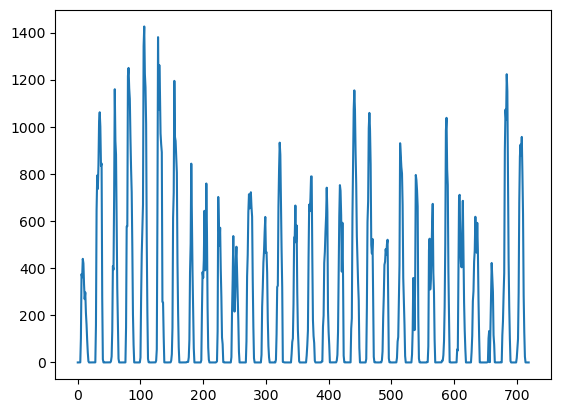

In [108]:
lgbm_preds = lgbm_model.predict(df_test_A[feature_test])
catboost_preds = catboost_model.predict(df_test_A[feature_test])
rf_preds = rf_model.predict(df_test_A[feature_test])

# Combine the predictions of the base models into a single feature matrix
X_new_meta = np.column_stack((lgbm_preds, catboost_preds,rf_preds))
df_stacked = pd.DataFrame({'lgbm': lgbm_preds, 'cat' :catboost_preds,'rf':rf_preds})
df_stacked['media'] = df_stacked[subset_cols].mean(axis=1)
df_stacked.head(50)
(10 ** df_stacked['lgbm'] -1).plot()

In [ ]:
# Make a prediction using the meta-model
y_new_pred = meta_model.predict(X_new_meta)

In [ ]:
pred_df = pd.DataFrame({'Prediction':pred})

In [ ]:
threshold = 0.05
pred_df['Prediction'] = pred_df['Prediction'].apply(lambda x: 0 if x < threshold else x)

In [ ]:
(pred_df*2).to_csv('A.csv')
(pred_df*2).plot()

In [ ]:
(pred_df*2).describe()

In [ ]:
import numpy as np

# Definisci la soglia per riconoscere i picchi
soglia =3000  # Modifica questa soglia in base ai tuoi dati
time_series_data = df['pv_measurement']
# Crea una lista vuota per la feature "picco"
picco = [0] * len(time_series_data)

# Scansiona la time series per individuare i picchi
for i in range(1, len(time_series_data) - 1):
    if time_series_data[i] > soglia:
        picco[i] = 1

df['picco'] = picco

# Visualizza il DataFrame con la nuova feature "picco"
print(df['picco'].head(50))


In [ ]:
df['pv_measurement'].quantile(0.95)

In [ ]:
import numpy as np

# Definisci la soglia per riconoscere i picchi
soglia =0  # Modifica questa soglia in base ai tuoi dati
time_series_data = df['pv_measurement']
# Crea una lista vuota per la feature "picco"
picco = [0] * len(time_series_data)

# Scansiona la time series per individuare i picchi
for i in range(1, len(time_series_data) - 1):
    if time_series_data[i] == soglia:
        picco[i] = 1

df['zero'] = picco

# Visualizza il DataFrame con la nuova feature "picco"
print(df['zero'].head(50))

In [ ]:
params = {'random_state': 42,'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}

In [ ]:
feature = ['direct_radW',
 'Total Solar Radiation (W/m²)',
 'sun_azimuthd',
 'clear_sky_radW',
 'wind_speed_u_10mms',
 'wind_speed_v_10mms',
 'diffuse_radW',
 'ceiling_height_aglm']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Crea un sottoinsieme del DataFrame con le osservazioni relative ai picchi
df_picchi = df[df['picco'] == 1]
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)
for train_index, test_index in tscv.split(df_picchi):
    train_data = df_picchi.iloc[train_index]
    test_data = df_picchi.iloc[test_index]
    # Split the data into features and target
    X_train = train_data[feature]
    y_train = train_data['pv_measurement']
    X_test = test_data[feature]
    y_test = test_data['pv_measurement']
    
    rf_picchi = RandomForestRegressor(**params)
    rf_picchi.fit(X_train, y_train)
    y_picchi = rf_picchi.predict(X_test)
    mae_picchi = mean_absolute_error(y_test, y_picchi)
    print(f"MAE dei picchi model: {mae_picchi}")


In [ ]:
# Crea un sottoinsieme del DataFrame con le osservazioni senza picchi
df_serie_generale = df[df['picco'] == 0]
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)
for train_index, test_index in tscv.split(df_serie_generale):
    train_data = df_serie_generale.iloc[train_index]
    test_data = df_serie_generale.iloc[test_index]
    # Split the data into features and target
    X_train = train_data[feature]
    y_train = train_data['pv_measurement']
    X_test = test_data[feature]
    y_test = test_data['pv_measurement']
    rf_serie = RandomForestRegressor(**params)
    rf_serie.fit(X_train, y_train)
    y_serie = rf_serie.predict(X_test)
    mae_serie = mean_absolute_error(y_test, y_serie)
    print(f"MAE dei serie model: {mae_serie}")

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
data = df
n_splits = 2
tscv = TimeSeriesSplit(n_splits=n_splits)
for train_index, test_index in tscv.split(data):
    train_data = data.iloc[train_index]
    test_data = data.iloc[test_index]
    # Split the data into features and target
    X_train = train_data[feature]
    y_train = train_data['pv_measurement']
    X_test = test_data[feature]
    y_test = test_data['pv_measurement']

    # Genera previsioni dai due modelli
    previsioni_picchi = rf_picchi.predict(X_test)
    previsioni_serie_generale = rf_serie.predict(X_test)
    
    # Combina le previsioni in un ensemble model
    ensemble_model = VotingRegressor(estimators=[ ('rf',rf_model)])

    # Addestra l'ensemble model sulle previsioni dei modelli base
    ensemble_model.fit(X_train, y_train)

    # Calcola le previsioni dell'ensemble model
    previsioni_ensemble = ensemble_model.predict(X_test)

    # Valuta le previsioni dell'ensemble model


    mse_ensemble = mean_absolute_error(y_test, previsioni_ensemble)
    print(f"MSE dell'ensemble model: {mse_ensemble}")


In [ ]:
df_prova = pd.DataFrame({'true':y_test,'pred':previsioni_ensemble})


In [ ]:
df_prova.plot()

In [ ]:
pred = pd.DataFrame(ensemble_model.predict(df_test_A[feature]))

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Creazione del modello
model = Sequential()
model.add(Dense(512, input_dim=data.shape[1]-1, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='relu'))  # Per la regressione, altrimenti usa 'softmax' per la classificazione
adam_optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7, loss= 'means-absolute-error')

# Compilazione del modello
model.compile(loss='mae', optimizer=adam_optimizer)  # Puoi scegliere la funzione di perdita e l'ottimizzatore appropriati per il tuo problema.
for train_index, test_index in tscv.split(data):
    train_data = data.iloc[train_index]
    test_data = data.iloc[test_index]
    # Split the data into features and target
    X_train = train_data.drop(columns='pv_measurement')
    y_train = train_data['pv_measurement']
    X_test = test_data.drop(columns='pv_measurement')
    y_test = test_data['pv_measurement']
# Addestramento del modello
    model.fit(X_train, y_train, epochs=100, batch_size=16)  # X_train è il tuo set di addestramento e y_train sono le etichette.
    predictions = model.predict(X_test)  # X_new_data è il nuovo insieme di dati su cui vuoi fare previsioni.

    # Valutazione del modello
    mse_ensemble = mean_absolute_error(y_test, predictions)
    print("Errore sul set di test:", mse_ensemble)



Epoch 1/100
89/89 [==============================] - 1s 2ms/step - loss: 543.0553
Epoch 2/100
89/89 [==============================] - 0s 3ms/step - loss: 441.8450
Epoch 3/100
89/89 [==============================] - 0s 2ms/step - loss: 327.9526
Epoch 4/100
89/89 [==============================] - 0s 2ms/step - loss: 261.4055
Epoch 5/100
89/89 [==============================] - 0s 2ms/step - loss: 242.0768
Epoch 6/100
89/89 [==============================] - 0s 2ms/step - loss: 235.4420
Epoch 7/100
89/89 [==============================] - 0s 2ms/step - loss: 231.3407
Epoch 8/100
89/89 [==============================] - 0s 2ms/step - loss: 228.0067
Epoch 9/100
89/89 [==============================] - 0s 3ms/step - loss: 225.8979
Epoch 10/100
89/89 [==============================] - 0s 2ms/step - loss: 224.1609
Epoch 11/100
89/89 [==============================] - 0s 2ms/step - loss: 222.7127
Epoch 12/100
89/89 [==============================] - 0s 2ms/step - loss: 221.2667
Epoch 13/100


178/178 [==============================] - 0s 2ms/step - loss: 234.1600
Epoch 95/100
178/178 [==============================] - 0s 2ms/step - loss: 234.6478
Epoch 96/100
178/178 [==============================] - 0s 2ms/step - loss: 234.2240
Epoch 97/100
178/178 [==============================] - 0s 2ms/step - loss: 234.0980
Epoch 98/100
178/178 [==============================] - 0s 2ms/step - loss: 234.1745
Epoch 99/100
178/178 [==============================] - 0s 2ms/step - loss: 234.2811
Epoch 100/100
178/178 [==============================] - 0s 2ms/step
Errore sul set di test: 149.83284092102
Epoch 1/100
267/267 [==============================] - 1s 2ms/step - loss: 207.7002
Epoch 2/100
267/267 [==============================] - 1s 2ms/step - loss: 207.1098
Epoch 3/100
267/267 [==============================] - 1s 3ms/step - loss: 207.8883
Epoch 4/100
267/267 [==============================] - 1s 3ms/step - loss: 207.2672
Epoch 5/100
267/267 [==============================] - 1s 

356/356 [==============================] - 1s 2ms/step - loss: 202.8458
Epoch 85/100
356/356 [==============================] - 1s 3ms/step - loss: 202.8239
Epoch 86/100
356/356 [==============================] - 1s 3ms/step - loss: 203.1474
Epoch 87/100
356/356 [==============================] - 1s 2ms/step - loss: 202.6604
Epoch 88/100
356/356 [==============================] - 1s 2ms/step - loss: 203.0807
Epoch 89/100
356/356 [==============================] - 1s 3ms/step - loss: 203.1627
Epoch 90/100
356/356 [==============================] - 1s 3ms/step - loss: 202.7668
Epoch 91/100
356/356 [==============================] - 1s 2ms/step - loss: 202.6872
Epoch 92/100
356/356 [==============================] - 1s 2ms/step - loss: 202.8177
Epoch 93/100
356/356 [==============================] - 1s 2ms/step - loss: 202.6037
Epoch 94/100
356/356 [==============================] - 1s 2ms/step - loss: 203.2283
Epoch 95/100
356/356 [==============================] - 1s 2ms/step - loss: 20

In [69]:
pred = pd.DataFrame(model.predict(df_test_A.drop(columns='pv_measurement')))
pred.plot()

KeyError: "['pv_measurement'] not found in axis"

In [ ]:
df['is_dayidx'][0:720].plot()

In [ ]:
from sklearn.preprocessing import *
import matplotlib.pylab as plt

def scale_df(df):
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
    return df_scaled

In [ ]:
df['pv_measurement'] = df_knn['pv_measurement']
df_scaled = scale_df(df)

# Number of features to plot
num_features = len(df.columns)

# Creating a figure
plt.figure(figsize=(15, 5*num_features))

for i, col in enumerate(df.columns, 1):
    plt.subplot(num_features, 1, i)
    plt.plot( df_scaled['pv_measurement'], label='Scaled PV Measurement', linestyle='-', marker='s')

    plt.plot( df_scaled[col], label=f'Scaled Feature: {col}', linestyle='-', marker='o')

    plt.xlabel('Time')
    plt.ylabel('Scaled Values')
    plt.title(f'Scaled {col} and PV Measurement over Time')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()